11.8 Standard form LP barrier with infeasible start Newton Method

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from LPsolver import *

In [11]:
# random problem data
np.random.seed(364+ord('a'))
m = 100
n= 500
A = np.vstack((np.random.randn(m-1, n), np.ones((1, n))))
x0 = np.random.rand(n) 
b = A @ x0
c = np.random.randn(n)

True
Barrier method with Newton infeasible start result -340.4106470959846
cvx result -340.4113228331666


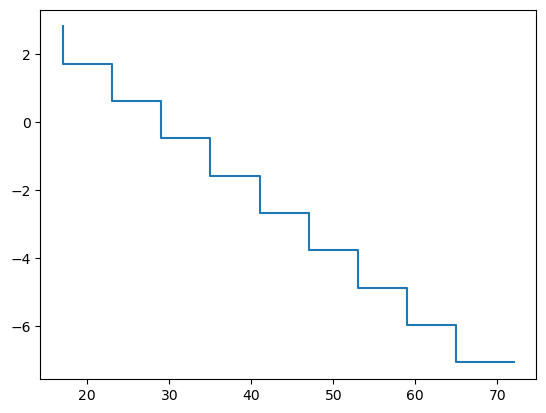

In [12]:
problem = LPsolver_Infeasible(A, b, c)
x_star, lambda_star, nu_star  = problem.barrier()
# check KKT condition (so x_star, lambda_star, nu_star are the primal and dual optimal points)
print(lambda_star @ x_star + nu_star @ (A @ x_star - b) < 1e-3)
print('Barrier method with Newton infeasible start result', x_star @ c)
# CVX result
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(c @ x)
constraints = [A @ x == b]
prob = cp.Problem(objective, constraints)
prob.solve()
print('cvx result', objective.value)
plt.step(np.cumsum(problem.history[0]), np.log(problem.history[1]))
plt.show()